<a href="https://colab.research.google.com/github/chakshudeep/Stock_Market_Growth_Prediction_Using_Deep_Learning_Algorithm/blob/main/StockMarketGrowthPrediction(TATA_STEEL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math

In [33]:
df=pd.read_csv('TATASTEEL.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-17,535.533264,537.105286,530.769592,533.341980,429.722595,2582514
1,2017-07-18,531.198303,542.107178,530.674316,536.676575,432.409332,3613061
2,2017-07-19,537.343445,545.298828,536.724182,544.203186,438.473663,3448965
3,2017-07-20,535.723816,537.105286,529.959778,530.864868,435.348419,3422253
4,2017-07-21,531.627075,531.674683,517.955261,527.101563,432.262268,3458466


In [34]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1232,2022-07-11,885.200012,929.000000,875.049988,912.750000,912.750000,15019334
1233,2022-07-12,904.900024,915.950012,893.599976,902.099976,902.099976,10017505
1234,2022-07-13,905.950012,914.200012,900.650024,904.849976,904.849976,7013511
1235,2022-07-14,910.000000,911.000000,895.000000,908.000000,908.000000,7449858
1236,2022-07-15,905.000000,910.299988,877.500000,883.799988,883.799988,8125351


In [36]:
df1=df.reset_index()['Close']
df1.shape
df1

0       533.341980
1       536.676575
2       544.203186
3       530.864868
4       527.101563
           ...    
1232    912.750000
1233    902.099976
1234    904.849976
1235    908.000000
1236    883.799988
Name: Close, Length: 1237, dtype: float64

Text(0, 0.5, 'stock prices')

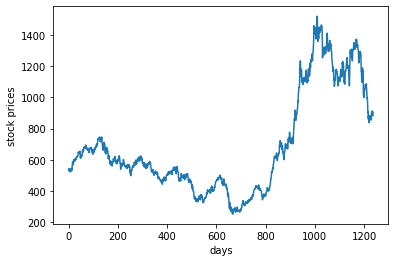

In [37]:
plt.plot(df1)
plt.xlabel("days")
plt.ylabel("stock prices")

In [38]:
#transforming the data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1237, 1)

In [39]:
df1

array([[0.22090781],
       [0.2235425 ],
       [0.22948934],
       ...,
       [0.51443919],
       [0.51692805],
       [0.49780743]])

In [40]:
#splitting datset into train and test data
training_size=int(len(df1)*0.65)
testing_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [41]:
len(train_data),len(test_data)

(804, 433)

In [42]:
 #converting array of values into a dataset matrix
 #preprocessing our data
 import numpy
 def create_dataset(dataset,time_step=1):
   dataX, dataY=[], []
   for i in range(len(dataset)-time_step-1):
     a=dataset[i:(i+time_step),0]
     dataX.append(a)
     dataY.append(dataset[i+time_step,0])
   return numpy.array(dataX),numpy.array(dataY)

In [43]:
#reshaping the data as X=t,t+1,t+2 and Y=t+4
time_step=100
X_train, Y_train= create_dataset(train_data, time_step)
X_test, Y_test= create_dataset(test_data, time_step)

In [44]:
print(X_train.shape) ,print(Y_train.shape)

(703, 100)
(703,)


(None, None)

In [45]:
print(X_test.shape), print(Y_test.shape)

(332, 100)
(332,)


(None, None)

In [46]:
#reshaping data for LSTM in 3D [samples,time_steps,features]
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [47]:
#creating our Staxked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 9s 330ms/step - loss: 0.0156 - val_loss: 0.0747
Epoch 2/100
11/11 [==============================] - 2s 208ms/step - loss: 0.0037 - val_loss: 0.0757
Epoch 3/100
11/11 [==============================] - 2s 207ms/step - loss: 0.0020 - val_loss: 0.0410
Epoch 4/100
11/11 [==============================] - 3s 258ms/step - loss: 9.9170e-04 - val_loss: 0.0064
Epoch 5/100
11/11 [==============================] - 2s 207ms/step - loss: 6.8704e-04 - val_loss: 0.0058
Epoch 6/100
11/11 [==============================] - 2s 208ms/step - loss: 6.1267e-04 - val_loss: 0.0046
Epoch 7/100
11/11 [==============================] - 3s 235ms/step - loss: 6.0540e-04 - val_loss: 0.0045
Epoch 8/100
11/11 [==============================] - 3s 282ms/step - loss: 5.5487e-04 - val_loss: 0.0046
Epoch 9/100
11/11 [==============================] - 4s 342ms/step - loss: 5.4271e-04 - val_loss: 0.0045
Epoch 10/100
11/11 [==============================] - 4s 424ms/step

In [50]:
#prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [51]:
#transform back to original form----inverse tranformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [52]:
#RMSE performance metrics
#train data RMSE
math.sqrt(mean_squared_error(Y_train,train_predict))

484.2059511297178

In [53]:
#test data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

1155.4519945196887

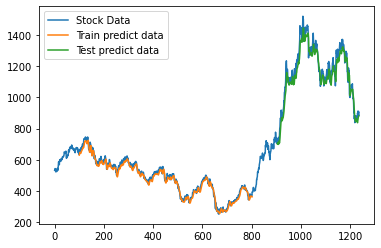

In [55]:
#plotting the growth

#shifting train for plotting
import numpy
lookback=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[lookback:len(train_predict)+lookback,:]=train_predict

#shfting test for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(lookback*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1),label='Stock Data')
plt.plot(trainPredictPlot,label='Train predict data')
plt.plot(testPredictPlot,label='Test predict data')
plt.legend()
plt.show()

In [56]:
len(test_data)

433

In [57]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7332990624586753,
 0.6992058896369918,
 0.6994429607026973,
 0.6480859514446625,
 0.7044601264907019,
 0.7640342761926103,
 0.8182356546931174,
 0.8292577166655984,
 0.8085568337175647,
 0.8202504675968781,
 0.8025520331361365,
 0.7913719883119916,
 0.8335242215426214,
 0.8279934666994483,
 0.824279998591459,
 0.7743056780442173,
 0.7991940748384957,
 0.8293761554102416,
 0.828981101492872,
 0.8282305377651539,
 0.8511436649725849,
 0.8665903118570161,
 0.8574249835434761,
 0.8574249835434761,
 0.8540275775319702,
 0.8330107288806087,
 0.8323390597905128,
 0.8401611471071248,
 0.859755859333828,
 0.862126182838045,
 0.88255045140346,
 0.8657606599152562,
 0.88255045140346,
 0.8723975846896518,
 0.8426500057491405,
 0.8420574248730864,
 0.8575435194713826,
 0.8476671715371452,
 0.8379093587407066,
 0.8283490729029527,
 0.8089124399210693,
 0.7637182140961267,
 0.7741871429064184,
 0.7845375357888035,
 0.795717581403056,
 0.8037767389952658,
 0.8228577657736448,
 0.7961126353204255,
 

In [60]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.88255045 0.86576066 0.88255045 0.87239758 0.84265001 0.84205742
 0.85754352 0.84766717 0.83790936 0.82834907 0.80891244 0.76371821
 0.77418714 0.78453754 0.79571758 0.80377674 0.82285777 0.79611264
 0.81420612 0.81377153 0.78892267 0.71990677 0.7205388  0.68261363
 0.66625843 0.67139413 0.73871128 0.73203491 0.68612966 0.72441035
 0.60775096 0.59463514 0.58890686 0.63070358 0.62398766 0.62710855
 0.63358749 0.63982936 0.6540513  0.64279227 0.65132537 0.64374036
 0.65815983 0.62505429 0.60834354 0.58325761 0.58657608 0.5576581
 0.51195038 0.51590092 0.48010904 0.49859754 0.46169949 0.46422785
 0.47335358 0.4852052  0.49393593 0.49606919 0.48457313 0.48915574
 0.47469678 0.47912141 0.47754119 0.51060719 0.49946669 0.52068106
 0.5122664  0.51443919 0.51692805 0.49780743 0.49098495 0.48289776
 0.47482443 0.46735242 0.46059254 0.45449695 0.44894373 0.44377607
 0.43883008 0.4339568  0.42903507 0.42397866 0.41873711 0.4132922
 0.40765202 0.40184319 0.39590353 0.38987499 0.38379

In [68]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [69]:
len(df1)

1237

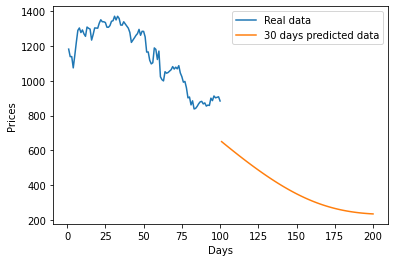

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[1137:]),label='Real data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='30 days predicted data')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

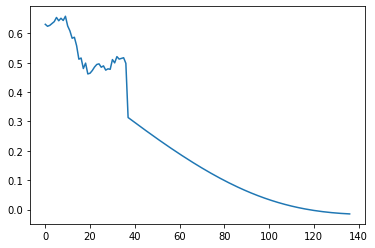

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

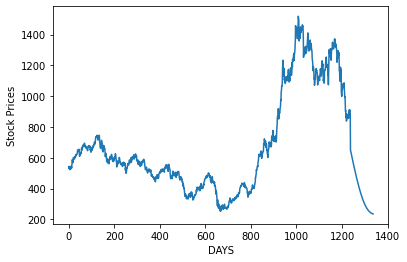

In [72]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.xlabel("DAYS")
plt.ylabel("Stock Prices")
plt.show()